In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [11]:
# cdc_csv = "Covid-19_Case_Surveillance_Public_Use_Data.csv"
# cdc_df = pd.read_csv(cdc_csv)

# cdc_df.head(2)

us_vac_csv = "Resource/us_state_vaccinations.csv"
us_vac_df = pd.read_csv(us_vac_csv)
us_vac_df.head(2)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.44,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.52,7.73,5906.0,5906.0,1205.0,0.222


In [12]:
us_vac_df.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used'],
      dtype='object')

In [13]:
total_df = us_vac_df[['date','location', 'total_vaccinations', 'total_distributed', 'total_vaccinations_per_hundred', 'distributed_per_hundred']]
total_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,1.59,7.69
1,2021-01-13,Alabama,84040.0,378975.0,1.71,7.73
2,2021-01-14,Alabama,92300.0,435350.0,1.88,8.88
3,2021-01-15,Alabama,100567.0,444650.0,2.05,9.07
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3008,2021-02-22,Wyoming,135635.0,150905.0,23.44,26.07
3009,2021-02-23,Wyoming,136163.0,167025.0,23.53,28.86
3010,2021-02-24,Wyoming,136366.0,172465.0,23.56,29.80
3011,2021-02-25,Wyoming,141545.0,183065.0,24.46,31.63


In [14]:
no_null_total_df = total_df.dropna(how='any')
no_null_total_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,1.59,7.69
1,2021-01-13,Alabama,84040.0,378975.0,1.71,7.73
2,2021-01-14,Alabama,92300.0,435350.0,1.88,8.88
3,2021-01-15,Alabama,100567.0,444650.0,2.05,9.07
7,2021-01-19,Alabama,130795.0,444650.0,2.67,9.07
...,...,...,...,...,...,...
3008,2021-02-22,Wyoming,135635.0,150905.0,23.44,26.07
3009,2021-02-23,Wyoming,136163.0,167025.0,23.53,28.86
3010,2021-02-24,Wyoming,136366.0,172465.0,23.56,29.80
3011,2021-02-25,Wyoming,141545.0,183065.0,24.46,31.63


In [15]:
no_null_total_df[(no_null_total_df["date"]=="2021-01-12")|(no_null_total_df["date"]=="2021-01-19")|(no_null_total_df["date"]=="2021-01-26")|(no_null_total_df["date"]=="2021-02-02")|(no_null_total_df["date"]=="2021-02-09")|(no_null_total_df["date"]=="2021-02-16")|(no_null_total_df["date"]=="2021-02-23")]

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,1.59,7.69
7,2021-01-19,Alabama,130795.0,444650.0,2.67,9.07
14,2021-01-26,Alabama,254959.0,569000.0,5.20,11.60
21,2021-02-02,Alabama,371882.0,680550.0,7.58,13.88
28,2021-02-09,Alabama,490969.0,823600.0,10.01,16.80
...,...,...,...,...,...,...
2981,2021-01-26,Wyoming,41339.0,71725.0,7.14,12.39
2988,2021-02-02,Wyoming,59018.0,89450.0,10.20,15.46
2995,2021-02-09,Wyoming,76457.0,113175.0,13.21,19.56
3002,2021-02-16,Wyoming,100186.0,122200.0,17.31,21.11


In [16]:
jan_12_df=no_null_total_df[(no_null_total_df["date"]=="2021-01-12")]
jan_12_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,1.59,7.69
46,2021-01-12,Alaska,35838.0,141600.0,4.90,19.36
92,2021-01-12,American Samoa,2124.0,10650.0,3.81,19.12
138,2021-01-12,Arizona,141355.0,563025.0,1.94,7.74
184,2021-01-12,Arkansas,40879.0,274400.0,1.36,9.09
276,2021-01-12,California,816301.0,3286050.0,2.07,8.32
322,2021-01-12,Colorado,224428.0,516750.0,3.90,8.97
368,2021-01-12,Connecticut,151395.0,250775.0,4.25,7.03
414,2021-01-12,Delaware,26410.0,88325.0,2.71,9.07
506,2021-01-12,District of Columbia,29812.0,62725.0,4.22,8.89


In [17]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
jan_12_df=jan_12_df[~jan_12_df.location.isin(nots)]

In [18]:
x_axis = np.arange(len(jan_12_df)) 
tick_locations = [value for value in x_axis]


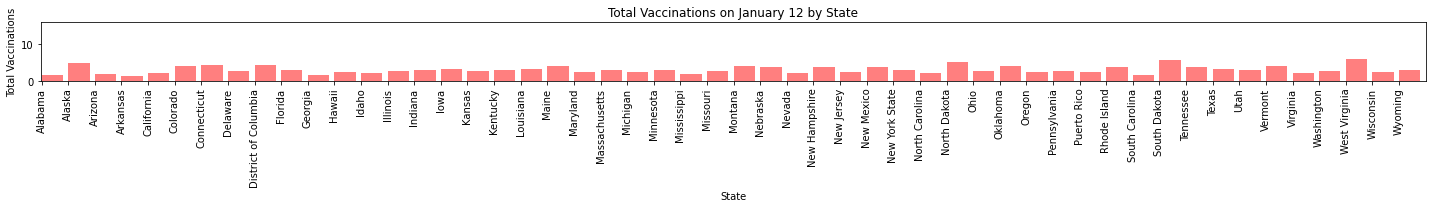

In [19]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_12_df ["total_vaccinations_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_12_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["total_vaccinations_per_hundred"])+10)
plt.title("Total Vaccinations on January 12 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
plt.tight_layout()
plt.savefig("./Images/vjan_12.png")
plt.show()

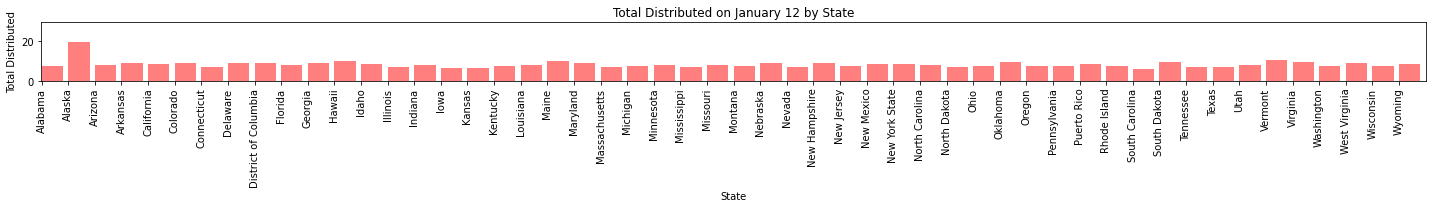

In [20]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_12_df ["distributed_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_12_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["distributed_per_hundred"])+10)
plt.title("Total Distributed on January 12 by State")
plt.xlabel("State")
plt.ylabel("Total Distributed")
 # Save our graph and show the grap
plt.tight_layout()
plt.savefig("./Images/djan_12.png")
plt.show()

In [21]:
jan_19_df=no_null_total_df[(no_null_total_df["date"]=="2021-01-19")]
jan_19_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
7,2021-01-19,Alabama,130795.0,444650.0,2.67,9.07
53,2021-01-19,Alaska,66331.0,150450.0,9.07,20.57
99,2021-01-19,American Samoa,4756.0,18450.0,8.54,33.13
145,2021-01-19,Arizona,266276.0,571725.0,3.66,7.86
191,2021-01-19,Arkansas,142337.0,297800.0,4.72,9.87
283,2021-01-19,California,1460430.0,3548575.0,3.70,8.98
329,2021-01-19,Colorado,330292.0,531775.0,5.74,9.23
375,2021-01-19,Connecticut,229524.0,328775.0,6.44,9.22
421,2021-01-19,Delaware,42557.0,91250.0,4.37,9.37
513,2021-01-19,District of Columbia,49988.0,68325.0,7.08,9.68


In [22]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
jan_19_df=jan_19_df[jan_19_df["location"]!="United States"]
jan_19_df=jan_19_df[~jan_19_df.location.isin(nots)]

In [23]:
x_axis = np.arange(len(jan_19_df)) 
tick_locations = [value for value in x_axis]

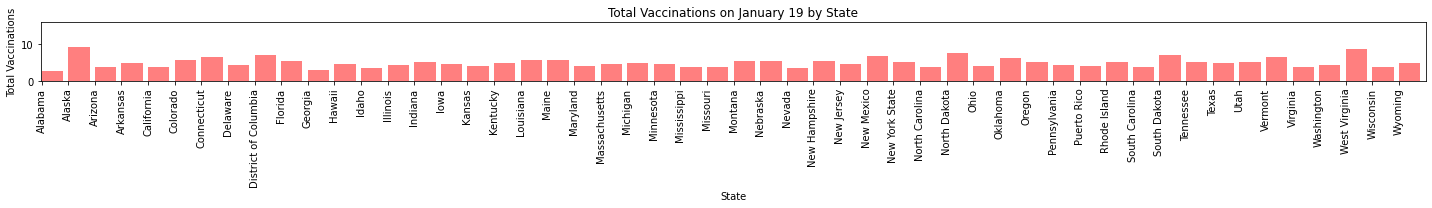

In [24]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_19_df ["total_vaccinations_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_19_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["total_vaccinations_per_hundred"])+10)
plt.title("Total Vaccinations on January 19 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
plt.tight_layout()
plt.savefig("./Images/vjan_19.png")
plt.show()

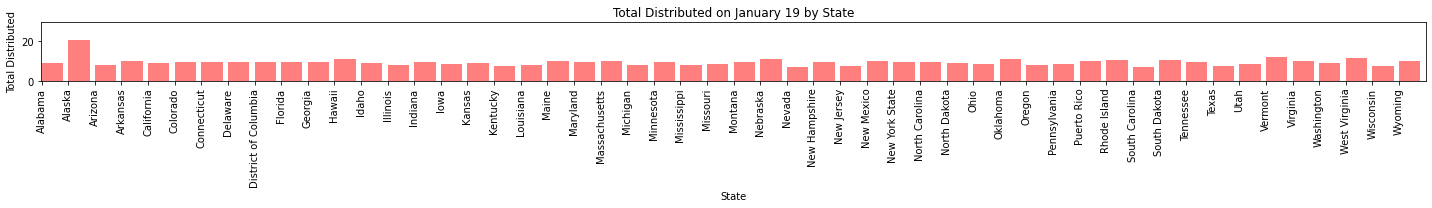

In [25]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_19_df ["distributed_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_19_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["distributed_per_hundred"])+10)
plt.title("Total Distributed on January 19 by State")
plt.xlabel("State")
plt.ylabel("Total Distributed")
plt.tight_layout()
plt.savefig("./Images/djan_19.png")
plt.show()

In [26]:
jan_26_df=no_null_total_df[(no_null_total_df["date"]=="2021-01-26")]
jan_26_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
14,2021-01-26,Alabama,254959.0,569000.0,5.20,11.60
60,2021-01-26,Alaska,98149.0,162925.0,13.42,22.27
106,2021-01-26,American Samoa,8315.0,18450.0,14.93,33.13
152,2021-01-26,Arizona,430892.0,837200.0,5.92,11.50
198,2021-01-26,Arkansas,236290.0,394775.0,7.83,13.08
290,2021-01-26,California,2446577.0,5340275.0,6.19,13.52
336,2021-01-26,Colorado,457746.0,726450.0,7.95,12.62
382,2021-01-26,Connecticut,342643.0,515675.0,9.61,14.46
428,2021-01-26,Delaware,68507.0,129250.0,7.03,13.27
520,2021-01-26,District of Columbia,64748.0,97600.0,9.17,13.83


In [27]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
jan_26_df=jan_26_df[jan_26_df["location"]!="United States"]
jan_26_df=jan_26_df[~jan_26_df.location.isin(nots)]

In [28]:
x_axis = np.arange(len(jan_26_df)) 
tick_locations = [value for value in x_axis]

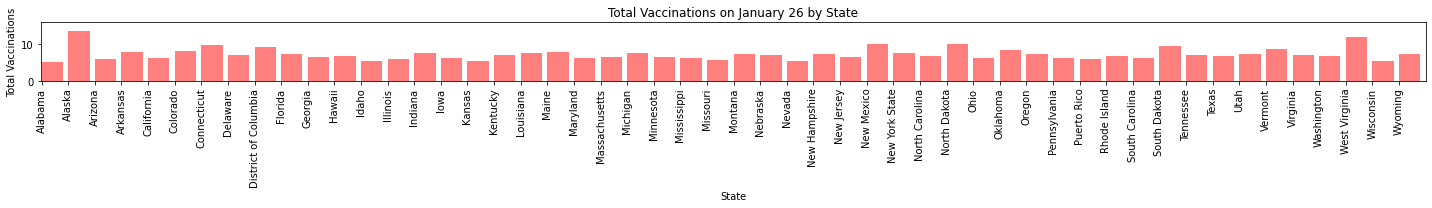

In [29]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_26_df ["total_vaccinations_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_26_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["total_vaccinations_per_hundred"])+10)
plt.title("Total Vaccinations on January 26 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
plt.tight_layout()
plt.savefig("./Images/vjan_26.png")
plt.show()

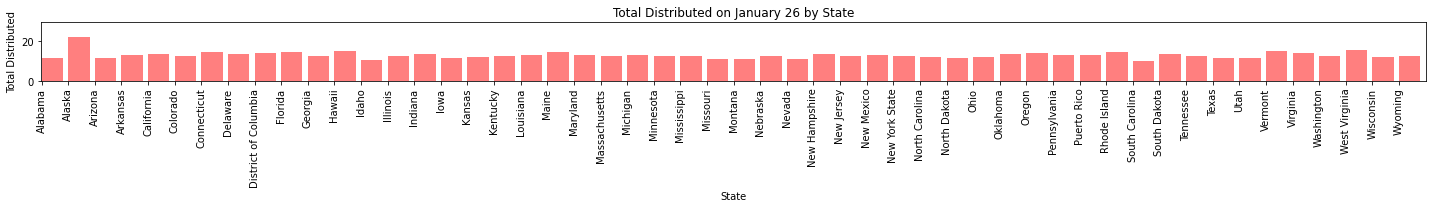

In [30]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_26_df ["distributed_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_26_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["distributed_per_hundred"])+10)
plt.title("Total Distributed on January 26 by State")
plt.xlabel("State")
plt.ylabel("Total Distributed")
plt.tight_layout()
plt.savefig("./Images/djan_26.png")
plt.show()

In [31]:
Feb_02_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-02")]
Feb_02_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
21,2021-02-02,Alabama,371882.0,680550.0,7.58,13.88
67,2021-02-02,Alaska,123443.0,196975.0,16.87,26.93
113,2021-02-02,American Samoa,10761.0,18450.0,19.32,33.13
159,2021-02-02,Arizona,631662.0,1082050.0,8.68,14.87
205,2021-02-02,Arkansas,314470.0,467800.0,10.42,15.50
297,2021-02-02,California,3543817.0,5670500.0,8.97,14.35
343,2021-02-02,Colorado,601347.0,871875.0,10.44,15.14
389,2021-02-02,Connecticut,456090.0,574650.0,12.79,16.12
435,2021-02-02,Delaware,103770.0,143775.0,10.66,14.76
527,2021-02-02,District of Columbia,83553.0,147125.0,11.84,20.85


In [32]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
Feb_02_df=Feb_02_df[~Feb_02_df.location.isin(nots)]

In [33]:
x_axis = np.arange(len(Feb_02_df)) 
tick_locations = [value for value in x_axis]

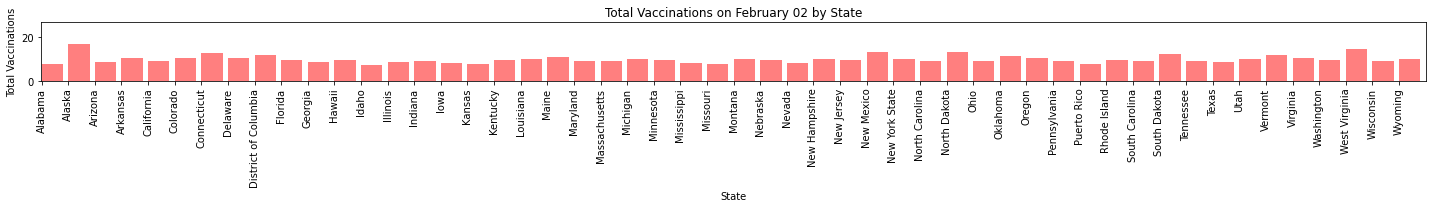

In [34]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_02_df ["total_vaccinations_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_02_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_02_df["total_vaccinations_per_hundred"])+10)
plt.title("Total Vaccinations on February 02 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
plt.tight_layout()
plt.savefig("./Images/vfeb_02.png")
plt.show()

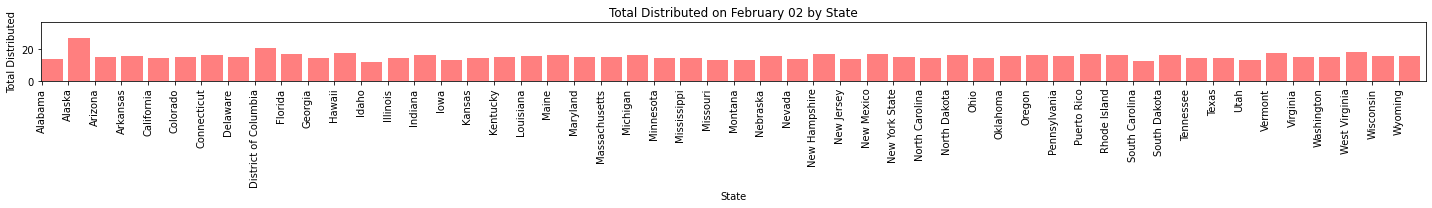

In [35]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_02_df ["distributed_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_02_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_02_df["distributed_per_hundred"])+10)
plt.title("Total Distributed on February 02 by State")
plt.xlabel("State")
plt.ylabel("Total Distributed")
plt.tight_layout()
plt.savefig("./Images/dfeb_02.png")
plt.show()

In [36]:
Feb_09_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-09")]
Feb_09_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
28,2021-02-09,Alabama,490969.0,823600.0,10.01,16.80
74,2021-02-09,Alaska,152874.0,256900.0,20.90,35.12
120,2021-02-09,American Samoa,12680.0,29450.0,22.77,52.88
166,2021-02-09,Arizona,863807.0,1265950.0,11.87,17.39
212,2021-02-09,Arkansas,404127.0,580775.0,13.39,19.24
304,2021-02-09,California,4784478.0,7385225.0,12.11,18.69
350,2021-02-09,Colorado,757560.0,1045000.0,13.16,18.15
396,2021-02-09,Connecticut,554322.0,800225.0,15.55,22.44
442,2021-02-09,Delaware,127523.0,162525.0,13.10,16.69
534,2021-02-09,District of Columbia,108475.0,166950.0,15.37,23.66


In [37]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
Feb_09_df=Feb_09_df[~Feb_09_df.location.isin(nots)]

In [38]:
x_axis = np.arange(len(Feb_09_df)) 
tick_locations = [value for value in x_axis]

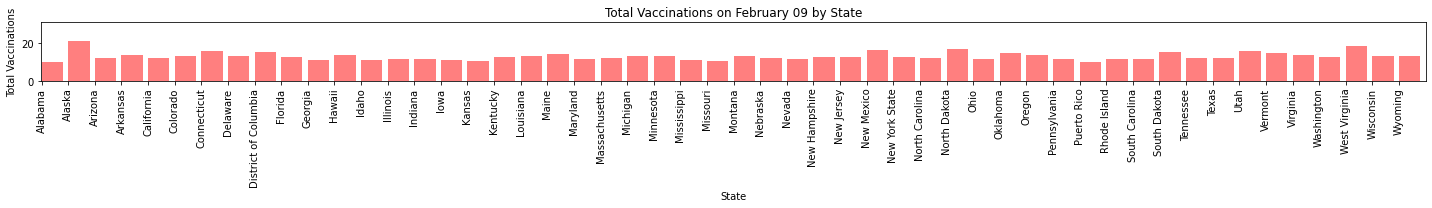

In [39]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_09_df ["total_vaccinations_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_09_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_09_df["total_vaccinations_per_hundred"])+10)
plt.title("Total Vaccinations on February 09 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
plt.tight_layout()
plt.savefig("./Images/dfeb_09.png")
plt.show()

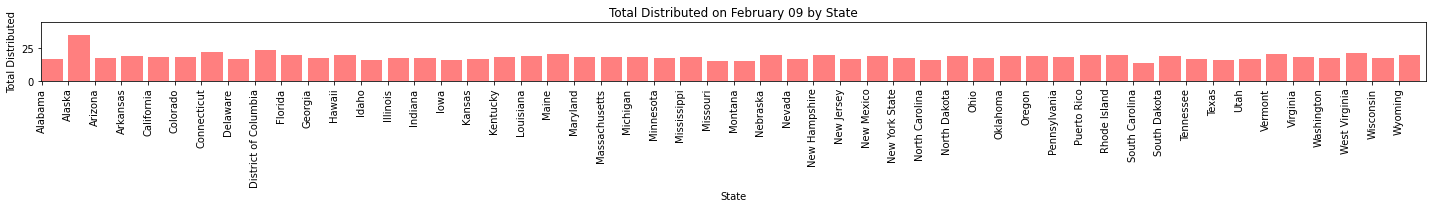

In [40]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_09_df ["distributed_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_09_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_09_df["distributed_per_hundred"])+10)
plt.title("Total Distributed on February 09 by State")
plt.xlabel("State")
plt.ylabel("Total Distributed")
plt.tight_layout()
plt.savefig("./Images/dfeb_09.png")
plt.show()

In [41]:
Feb_16_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-16")]
Feb_16_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
35,2021-02-16,Alabama,636682.0,1015775.0,12.98,20.72
81,2021-02-16,Alaska,191008.0,271550.0,26.11,37.12
127,2021-02-16,American Samoa,16109.0,29450.0,28.93,52.88
173,2021-02-16,Arizona,1154583.0,1396475.0,15.86,19.19
219,2021-02-16,Arkansas,483438.0,631675.0,16.02,20.93
311,2021-02-16,California,6210992.0,8250650.0,15.72,20.88
357,2021-02-16,Colorado,1000597.0,1224575.0,17.38,21.26
403,2021-02-16,Connecticut,711142.0,914075.0,19.95,25.64
449,2021-02-16,Delaware,152387.0,189050.0,15.65,19.41
541,2021-02-16,District of Columbia,126500.0,193900.0,17.92,27.47


In [42]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
Feb_16_df=Feb_16_df[~Feb_16_df.location.isin(nots)]

In [43]:
x_axis = np.arange(len(Feb_16_df)) 
tick_locations = [value for value in x_axis]

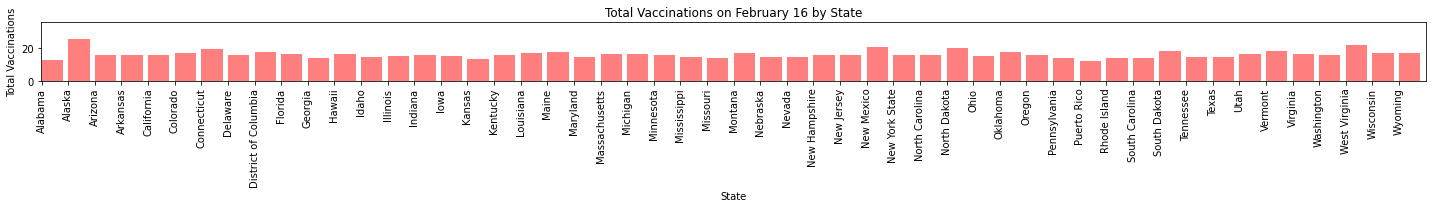

In [44]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_16_df ["total_vaccinations_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_16_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_16_df["total_vaccinations_per_hundred"])+10)
plt.title("Total Vaccinations on February 16 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
plt.tight_layout()
plt.savefig("./Images/vfeb_16.png")
plt.show()

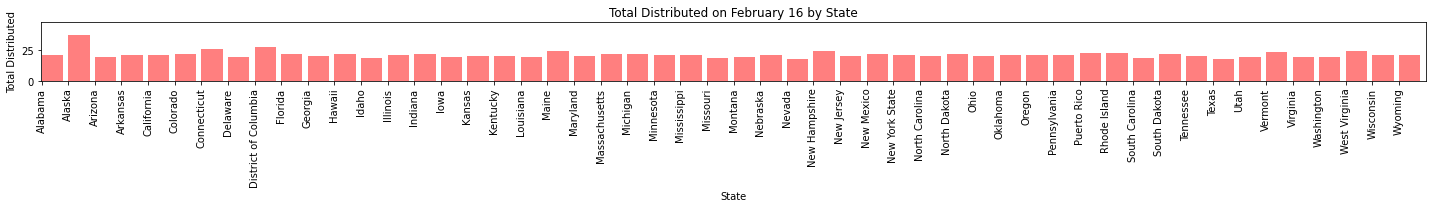

In [45]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_16_df ["distributed_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_16_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_16_df["distributed_per_hundred"])+10)
plt.title("Total Distributed on February 16 by State")
plt.xlabel("State")
plt.ylabel("Total Distributed")
plt.tight_layout()
plt.savefig("./Images/dfeb_16.png")
plt.show()

In [46]:
Feb_23_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-23")]
Feb_23_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
42,2021-02-23,Alabama,815108.0,1084440.0,16.62,22.12
88,2021-02-23,Alaska,239927.0,304875.0,32.80,41.68
134,2021-02-23,American Samoa,18816.0,29450.0,33.79,52.88
180,2021-02-23,Arizona,1525794.0,1755635.0,20.96,24.12
226,2021-02-23,Arkansas,540192.0,794230.0,17.90,26.32
...,...,...,...,...,...,...
2825,2021-02-23,Virginia,1765927.0,2283165.0,20.69,26.75
2871,2021-02-23,Washington,1493572.0,1920320.0,19.61,25.22
2917,2021-02-23,West Virginia,470643.0,512865.0,26.26,28.62
2963,2021-02-23,Wisconsin,1259647.0,1401205.0,21.63,24.07


In [47]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
Feb_23_df=Feb_23_df[~Feb_23_df.location.isin(nots)]

In [48]:
x_axis = np.arange(len(Feb_23_df)) 
tick_locations = [value for value in x_axis]

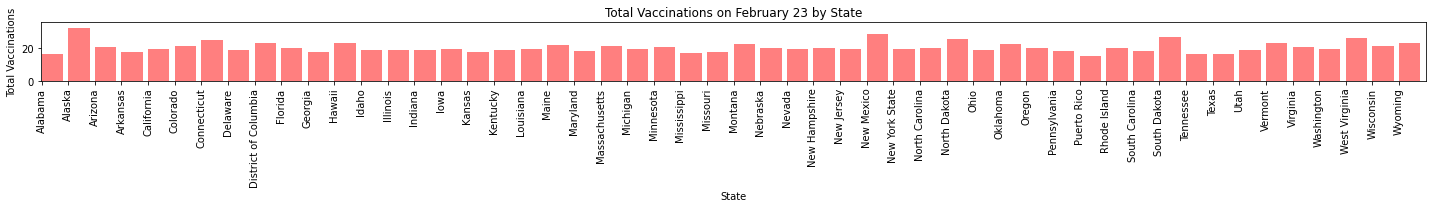

In [49]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_23_df ["total_vaccinations_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_23_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_16_df["total_vaccinations_per_hundred"])+10)
plt.title("Total Vaccinations on February 23 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
plt.tight_layout()
plt.savefig("./Images/vfeb_23.png")
plt.show()


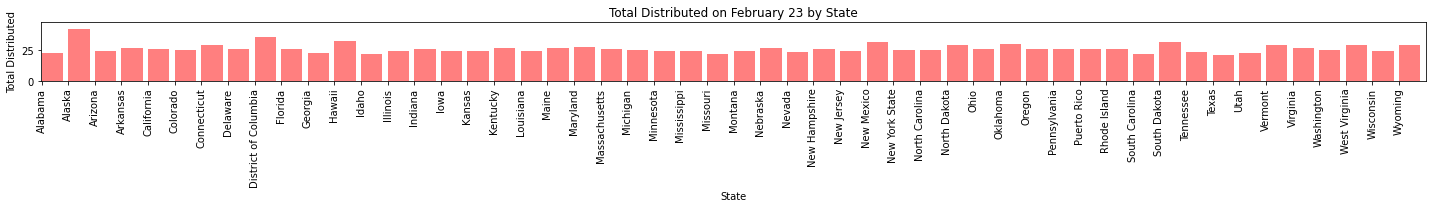

In [50]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_23_df ["distributed_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_23_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_16_df["distributed_per_hundred"])+10)
plt.title("Total Distributed on February 23 by State")
plt.xlabel("State")
plt.ylabel("Total Distributed")
plt.tight_layout()
plt.savefig("./Images/dfeb_23.png")
plt.show()